In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # for image display
from google.colab import drive
from skimage import io
drive.mount('/content/gdrive')

Mounted at /content/gdrive


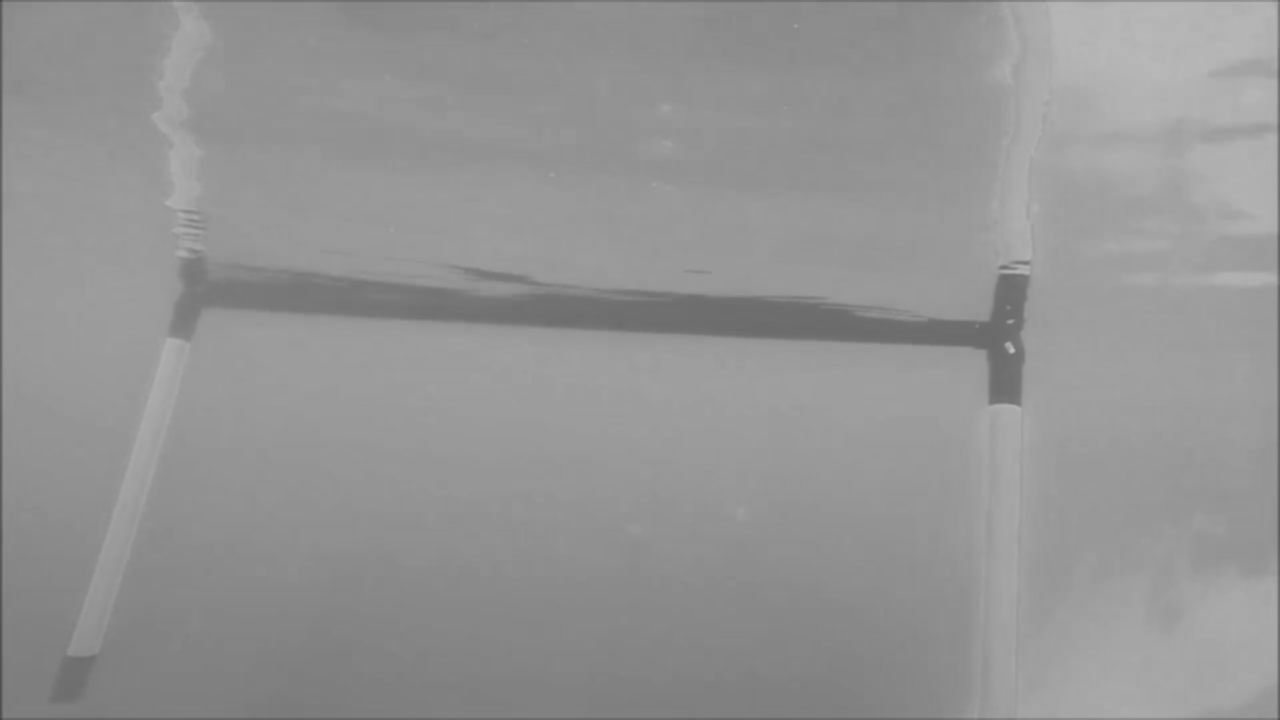

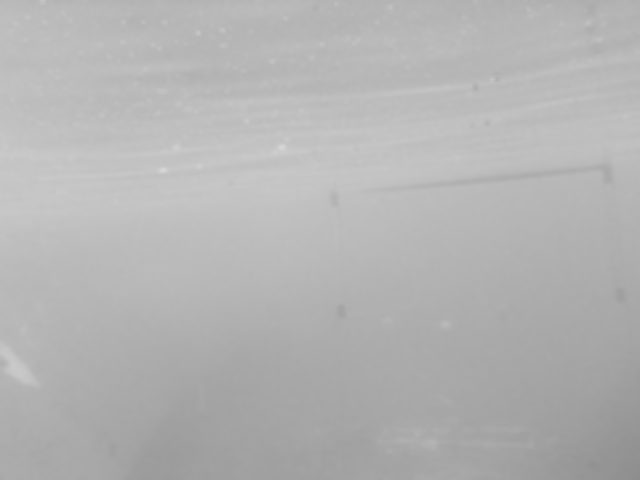

In [ ]:
img = io.imread("/content/gdrive/MyDrive/1009.jpg")
img1 = io.imread("/content/gdrive/MyDrive/one.jpg")

#Convert image to gray just cause I can
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(gray_image,(3,3),cv2.BORDER_DEFAULT)
img_blur1 = cv2.GaussianBlur(gray_image1,(5,5),cv2.BORDER_DEFAULT)
cv2_imshow(img_blur)
cv2_imshow(img_blur1)

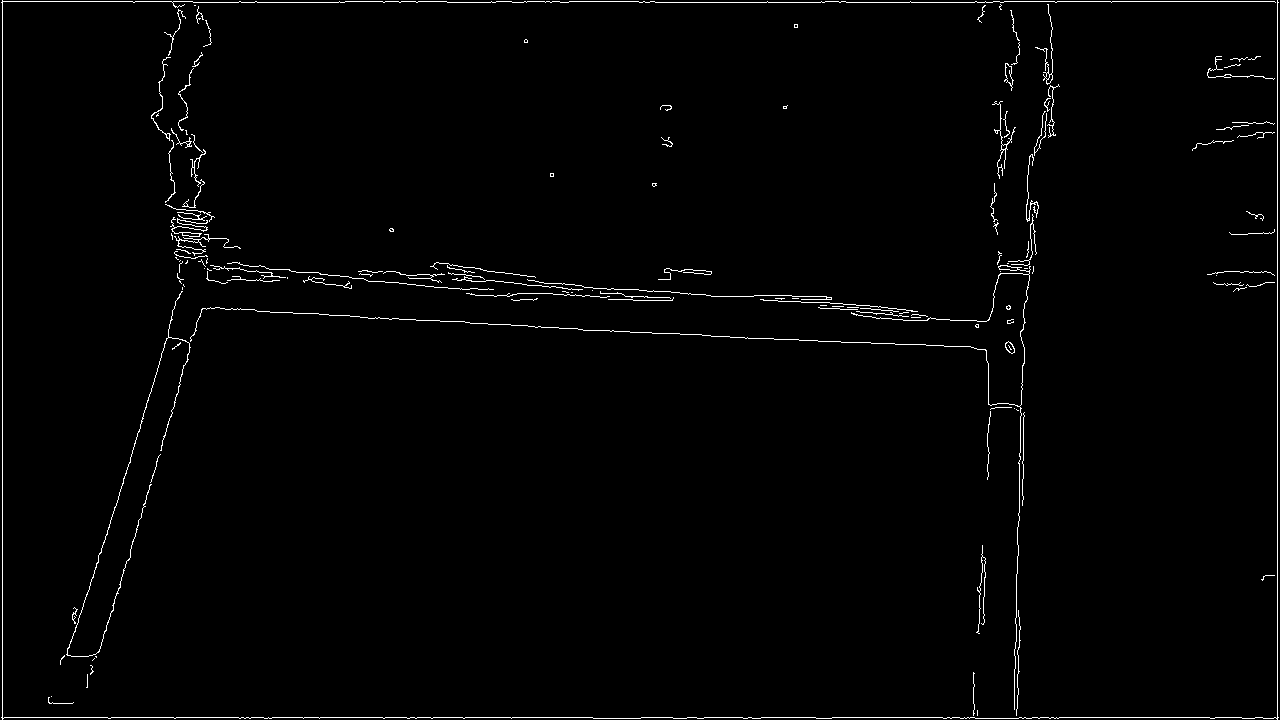

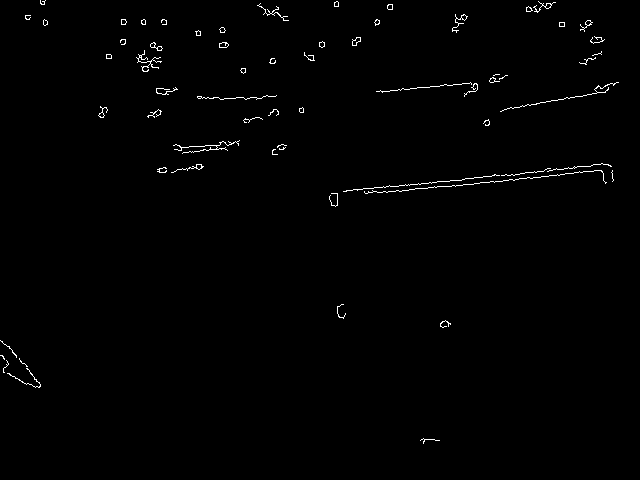

In [ ]:
#get the edges of the gate
edges = cv2.Canny(img_blur, 0, 25)
edges1 = cv2.Canny(img_blur1, 0, 25)
cv2_imshow(edges)
cv2_imshow(edges1)

coordinates
990.197187373533 185.23987034035656


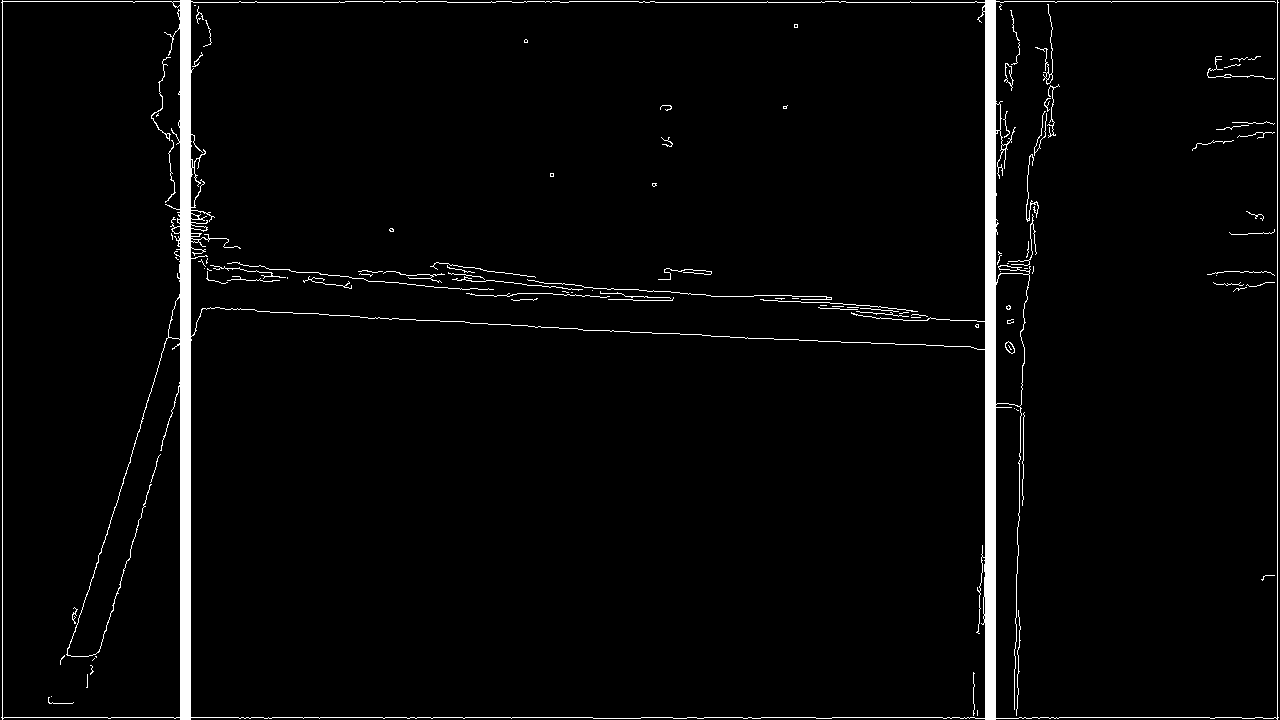

In [ ]:
# split the image into 10 horizontal zone
# average the points in the zone where the points are top 2 most
indices = np.where(edges != [0])
height, width = edges.shape
count = [[1,0],[2,0],[3,0],[4,0],[5,0],[6,0],[7,0],[8,0],[9,0],[10,0]]
n = width/10
for i in range (0,len(indices[0])):
  index = int(indices[1][i]/n)
  count[index][1]+=1

# sort the count
def Sort(sub_li):
  return(sorted(sub_li, key = lambda x: x[1])) 
count = Sort(count)

#avergae the points in the zone
Line1 = 0
Line2 = 0
Lcount = 0
Rcount = 0
for i in range (0,len(indices[0])):
  index = int(indices[1][i]/n)
  if (index == count[9][0]-1):
    Line1+=indices[1][i]
    Rcount+=1
  elif (index == count[8][0]-1):
    Line2+=indices[1][i]
    Lcount+=1
Line1 = Line1/Rcount
Line2 = Line2/Lcount
print("coordinates")
print(Line1,Line2)
#draw the line
gate1 = cv2.line(edges,(int(Line1),0),(int(Line1),height),(255, 255, 0),9)
gate2 = cv2.line(edges,(int(Line2),0),(int(Line2),height),(255, 255, 0),9)
cv2_imshow(gate2)
